<ipython-input-13-de371b478564>:6: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(IC)
<ipython-input-13-de371b478564>:7: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


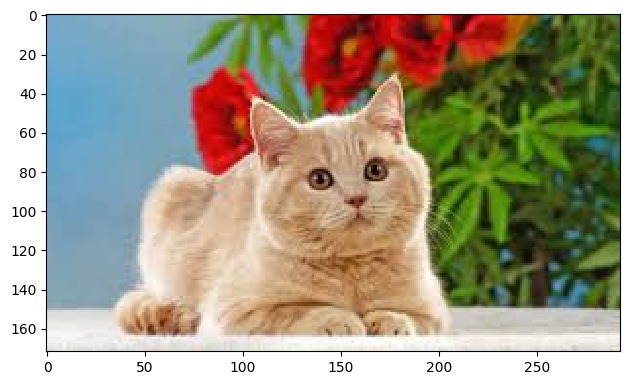

<ipython-input-13-de371b478564>:12: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(I)


Here N = 50396 and d = 1
The shape of the array should be 50396 x 1


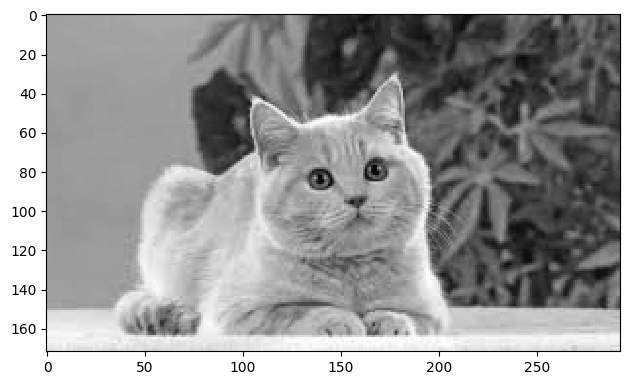

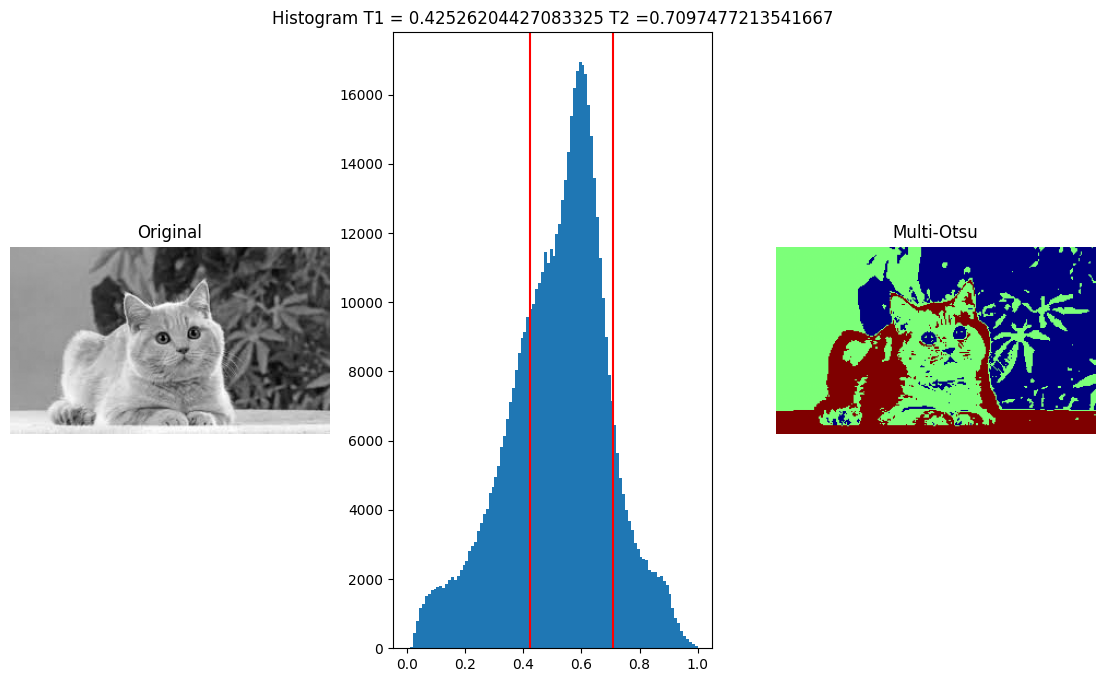

In [13]:
# Otsu Multiple Thresholds

from skimage.filters import threshold_multiotsu

IC = sk.io.imread('/content/drive/MyDrive/CV/5.jpg')
sk.io.imshow(IC)
sk.io.show()

# Convert to grayscale
I = sk.color.rgb2gray(IC)
I.shape
sk.io.imshow(I)

# Reshape image as NPIX x NCHANNELS array
v_I = np.reshape(I,(I.shape[0]*I.shape[1],1))

print('Here N = {} and d = {}'.format(I.shape[0]*I.shape[1],1))
print('The shape of the array should be {} x {}'.format(I.shape[0]*I.shape[1],1))

v_I.shape

# Applying multi-Otsu threshold for the default value, generating three classes by default
thresholds = threshold_multiotsu(I)

regions = np.digitize(I, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 8))

ax[0].imshow(I, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(flat_data, bins=100,range=[flat_data.min(), flat_data.max()])
ax[1].set_title('Histogram T1 = {} T2 ={}'.format(thresholds[0],thresholds[1]))
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu')
ax[2].axis('off')

plt.subplots_adjust()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-17-b0eaeee07d68>:11: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(IC)
<ipython-input-17-b0eaeee07d68>:12: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


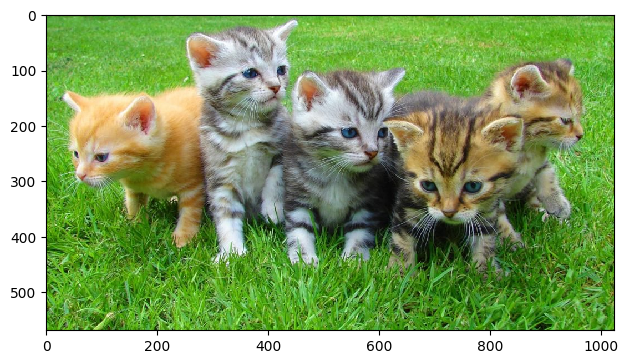

<ipython-input-17-b0eaeee07d68>:17: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(I)


Here N = 582656 and d = 1
The shape of the array should be 582656 x 1


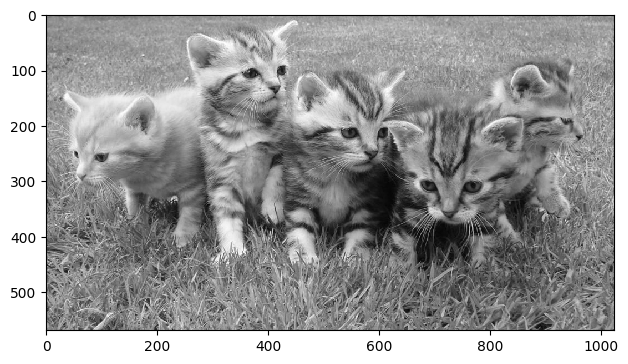

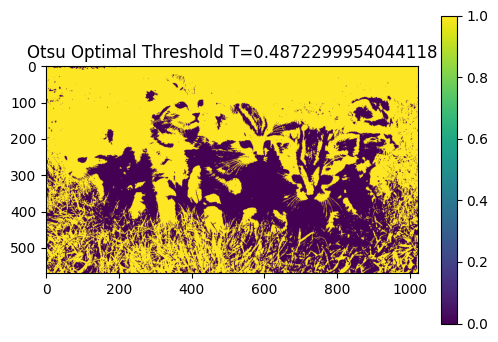

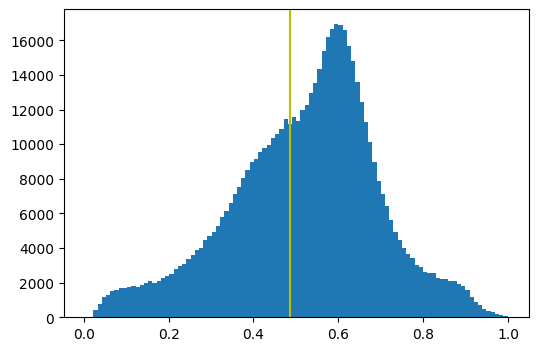

In [17]:
# Thresholding - Otsu

import skimage as sk
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from google.colab import drive
drive.mount('/content/drive')
IC = sk.io.imread('/content/drive/MyDrive/CV/3.jpg')
sk.io.imshow(IC)
sk.io.show()

# Convert to grayscale
I = sk.color.rgb2gray(IC)
I.shape
sk.io.imshow(I)

# Reshape image as NPIX x NCHANNELS array
v_I = np.reshape(I,(I.shape[0]*I.shape[1],1))

print('Here N = {} and d = {}'.format(I.shape[0]*I.shape[1],1))
print('The shape of the array should be {} x {}'.format(I.shape[0]*I.shape[1],1))

v_I.shape

thresh = threshold_otsu(I)
binary = I > thresh

fig = plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
imgplot = plt.imshow(binary)
plt.title('Otsu Optimal Threshold T={}'.format(thresh))
plt.colorbar()
plt.show()

flat_data = I.flatten()
fig = plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
n = plt.hist(flat_data,bins=100,range=[flat_data.min(),flat_data.max()])
plt.axvline(thresh,color='y')
plt.show()

## Unsupervised Segmentation Method

In [21]:
v_IC = np.reshape(IC,(IC.shape[0]*IC.shape[1],IC.shape[2])) # reshape image as NPIX x NCHANNELS array

print('Here N = {} and d = {}'.format(IC.shape[0]*IC.shape[1],IC.shape[2]))
print('The sape of the array should be {} x {}'.format(IC.shape[0]*IC.shape[1],IC.shape[2]))

v_IC.shape

Here N = 582656 and d = 3
The sape of the array should be 582656 x 3


(582656, 3)

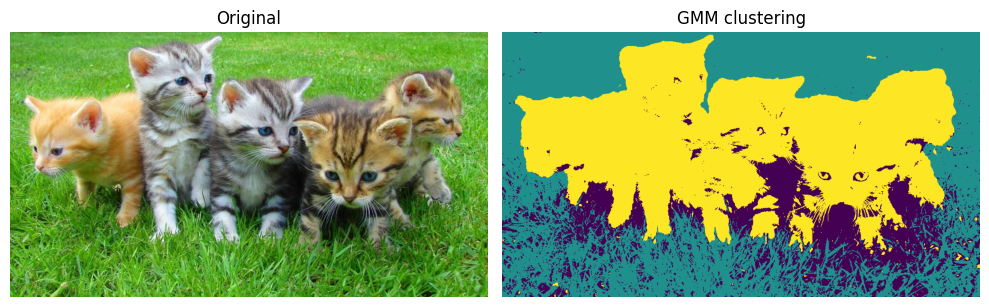

In [22]:
from sklearn import mixture
from matplotlib import gridspec

gmm = mixture.GaussianMixture(n_components=3).fit(v_IC) # Fit a GMM model
v_gmm = gmm.fit_predict(v_IC) # Predict GMM cluster labels for each pixel
IC_gmm = np.reshape(v_gmm,(IC.shape[0],IC.shape[1])) # reshape back to original image size

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 2)

ax0 = fig.add_subplot(gs[0,0])
ax0.imshow(IC)
ax0.set_title('Original')
ax0.set_axis_off()

ax1 = fig.add_subplot(gs[0,1])
ax1.imshow(IC_gmm)
ax1.set_title('GMM clustering')
ax1.set_axis_off()

plt.tight_layout()
plt.show()

## Supervised Segmentation Method

Pixel accuracy on 20 % test split : 0.9995366079703429
Confusion matrix:
[[44610    20]
 [   34 71868]]
              precision    recall  f1-score   support

  background       1.00      1.00      1.00     44630
  foreground       1.00      1.00      1.00     71902

    accuracy                           1.00    116532
   macro avg       1.00      1.00      1.00    116532
weighted avg       1.00      1.00      1.00    116532



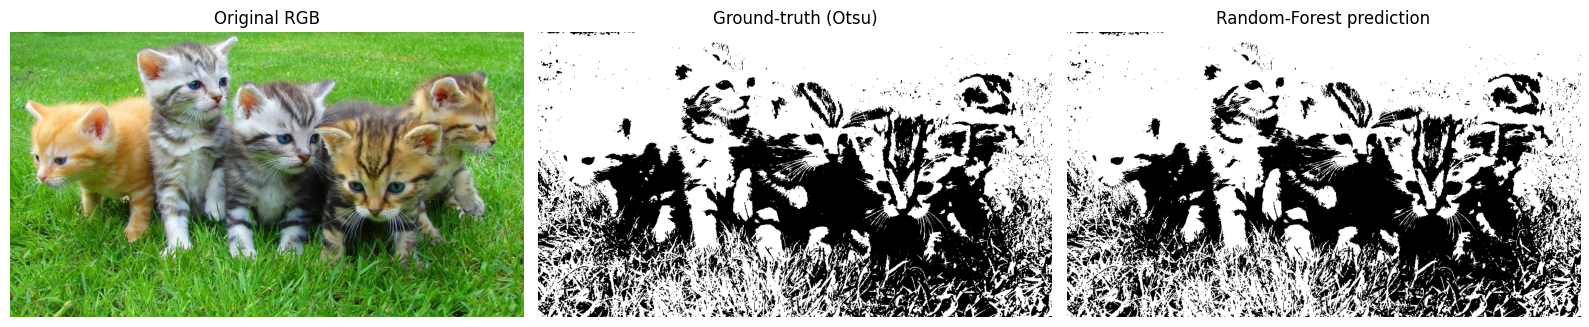

In [27]:
# features : raw R,G,B pixel values  (shape N_pixels × 3)
# labels   : Otsu mask (0 = background, 1 = foreground)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Feature matrix (RGB), and target vector (binary mask)
rows, cols, _ = IC.shape
X = IC.reshape(-1, 3) # R,G,B columns
y = binary.reshape(-1).astype(np.uint8)

# Split into train/test pixels (20 % held out)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0, stratify=y
)

# Train the Random-Forest
rf = RandomForestClassifier(n_estimators=200, max_depth=None, n_jobs=-1, random_state=0)
rf.fit(X_train, y_train)

# Predict the entire image
y_pred_full = rf.predict(X)
rf_mask = y_pred_full.reshape(rows, cols)

# Quantitative evaluation on held-out pixels
print("Pixel accuracy on 20 % test split :", accuracy_score(y_test, rf.predict(X_test)))
print("Confusion matrix:")
print(confusion_matrix(y_test, rf.predict(X_test)))
print(classification_report(y_test, rf.predict(X_test), target_names=["background", "foreground"]))


fig, ax = plt.subplots(1, 3, figsize=(16, 5))
ax[0].imshow(IC);
ax[0].set_title("Original RGB");
ax[0].axis('off')
ax[1].imshow(binary, cmap='gray');
ax[1].set_title("Ground-truth (Otsu)");
ax[1].axis('off')
ax[2].imshow(rf_mask, cmap='gray');
ax[2].set_title("Random-Forest prediction");
ax[2].axis('off')
plt.tight_layout();
plt.show()

Pixel-wise accuracy on test split: 1.0
Confusion matrix:
 [[14247     0]
 [    0  9024]]
              precision    recall  f1-score   support

  background       1.00      1.00      1.00     14247
        coin       1.00      1.00      1.00      9024

    accuracy                           1.00     23271
   macro avg       1.00      1.00      1.00     23271
weighted avg       1.00      1.00      1.00     23271



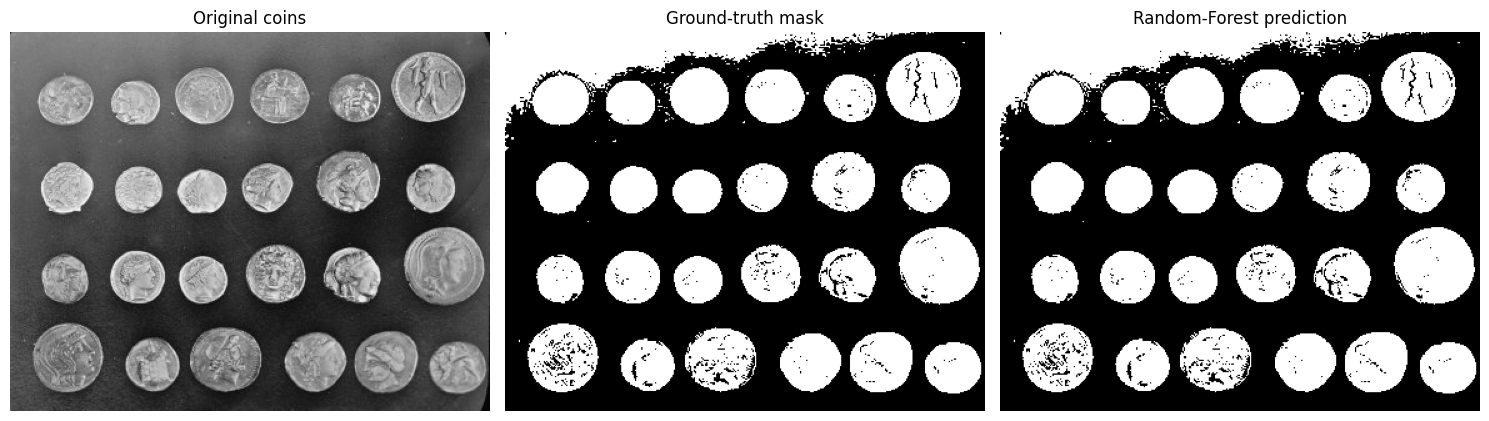

In [28]:
# import numpy as np
# import matplotlib.pyplot as plt
# import skimage.io as skio
import skimage.filters as skf

# Load an example image from skimage and build its label mask
gray_img = sk.img_as_ubyte(sk.data.coins()) # (303, 384), uint8
rows, cols = gray_img.shape

# Make it "RGB" by stacking the grayscale channel -> shape (rows, cols, 3)
image = np.dstack([gray_img] * 3)

# Otsu threshold to create a binary mask: coin = 1, background = 0
thresh = skf.threshold_otsu(gray_img)
labels = (gray_img > thresh).astype(np.uint8)

# Flatten into the 2-D feature matrix & 1-D label vector
image_2D = image.reshape((-1, 3)) # N_pixels × 3  (R,G,B — identical here)
labels_1D = labels.reshape(-1) # N_pixels

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    image_2D, labels_1D, test_size=0.20, random_state=0, stratify=labels_1D
)

# Fit Random-Forest and predict the whole image
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
clf.fit(X_train, y_train)

predicted_labels_flat = clf.predict(image_2D) # entire image
predicted_labels = predicted_labels_flat.reshape(rows, cols)

# Evaluate on the held-out pixels
print("Pixel-wise accuracy on test split:", accuracy_score(y_test, clf.predict(X_test)))
print("Confusion matrix:\n", confusion_matrix(y_test, clf.predict(X_test)))
print(classification_report(y_test, clf.predict(X_test), target_names=["background", "coin"]))

# Display original, ground truth, and RF segmentation
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(gray_img, cmap='gray')
ax[0].set_title("Original coins");     ax[0].axis('off')

ax[1].imshow(labels, cmap='gray')
ax[1].set_title("Ground-truth mask");  ax[1].axis('off')

ax[2].imshow(predicted_labels, cmap='gray')
ax[2].set_title("Random-Forest prediction"); ax[2].axis('off')

plt.tight_layout(); plt.show()